##  Распределения

В этом задании мы немного поработаем в python с разными случайными величинами. Делать это задание необязательно, но рекомендуется. 

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

### Упражнение 1 


#### а) Задайте генератор для случайной величины имеющей нормальное распределение: $X \sim N(4, 10^2)$. 

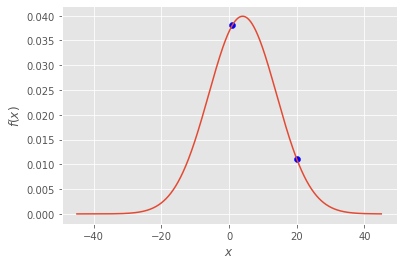

In [2]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

norm_rv = sts.norm(loc=4, scale=10)

# your code here

x = np.linspace(-45, 45, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1) и f(20)
plt.scatter([1,20], [norm_rv.pdf(1), norm_rv.pdf(20)], color="blue")

#### б) Найдите вероятности $P(X > 4)$, $P(X \in [2; 20])$, $P(X < −5)$. Запишите их в переменные `p1, p2, p3`. 

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p1 = 1-norm_rv.cdf(4) 
p2 = norm_rv.cdf(20)-norm_rv.cdf(2)
p3 = norm_rv.cdf(-5)

# your code here
print(p1)
print(p2)
print(p3)

0.5
0.5244604177395451
0.18406012534675947


In [24]:
assert p1 == 0.5
assert np.abs(p2 - 0.5244604) < 1e-5
assert np.abs(p3 - 0.18406012) < 1e-5


В качестве упражнения нарисуем также на графике диапазон вероятностей от 2 до 20, закрасим плотность, которая соответствует 52% вероятности (p2)

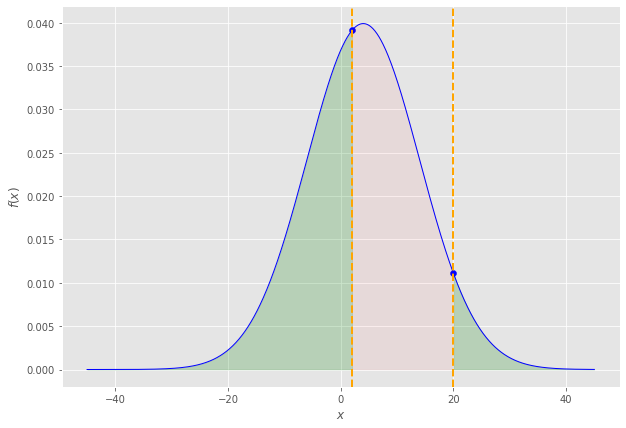

In [6]:
plt.figure(figsize=(10,7))
plt.plot(x,pdf,color = 'blue',lw = 1)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.scatter([2,20],[norm_rv.pdf(2),norm_rv.pdf(20)], color="blue")

xq = np.linspace(-45,2,100)
yq = norm_rv.pdf(xq)

plt.fill_between(xq, 0, yq, color='green', alpha=0.2)
plt.axvline(2,color='orange',linestyle="--",lw=2)

xq2 = np.linspace(20,45,100)
yq2 = norm_rv.pdf(xq2)

plt.fill_between(xq2,0,yq2, color='green',alpha=0.2)
plt.axvline(20,color='orange',linestyle="--",lw=2)

xq3 = np.linspace(2,20,100)
yq3 = norm_rv.pdf(xq3)

plt.fill_between(xq3,0,yq3, color='red',alpha=0.05)

#### в) Найдите число $a$ такое, что $P(X > a) = 0.3$.

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

a = norm_rv.ppf(1-0.3)

# your code here
print(a)

9.244005127080406


In [8]:
assert np.abs(a - 9.2440051) < 1e-5

#### г) Найдите число $b$ такое, что $P(X \in [4 - b; 4 + b]) = 0.5$.

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

b = norm_rv.ppf(1-0.25)-4

# your code here
print(b)

6.744897501960818


In [10]:
assert np.abs(b - 6.7448975) < 1e-5

#### д) Сгенерируйте выборку размера $100$. Постройте по этой выборке гистограмму. На том же рисунке изобразите плотность распределения нормальной случайной величины. 

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
sample = norm_rv.rvs(1000)
# your code here

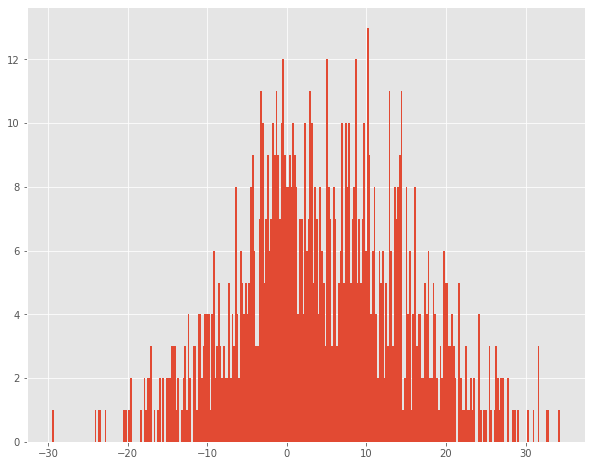

In [12]:
plt.figure(figsize=(10,8))
plt.hist(sample, bins=300);

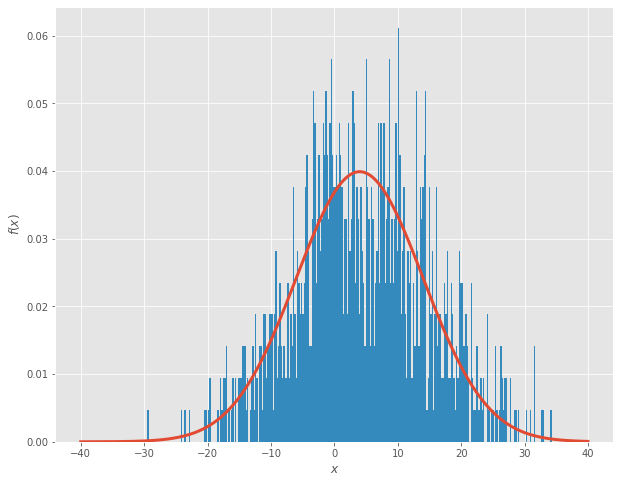

In [13]:
x = np.linspace(-40, 40, 1000)
pdf = norm_rv.pdf(x)

plt.figure(figsize=(10,8))
# плотность 
plt.plot(x, pdf, lw=3)

# гистограмма, параметр density отнормировал её. 
plt.hist(sample, bins=300, density=True);

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

#### е) Оцените эмпирическую функцию распределения. Изобразите её и теоретическую функцию распределения на графике. 

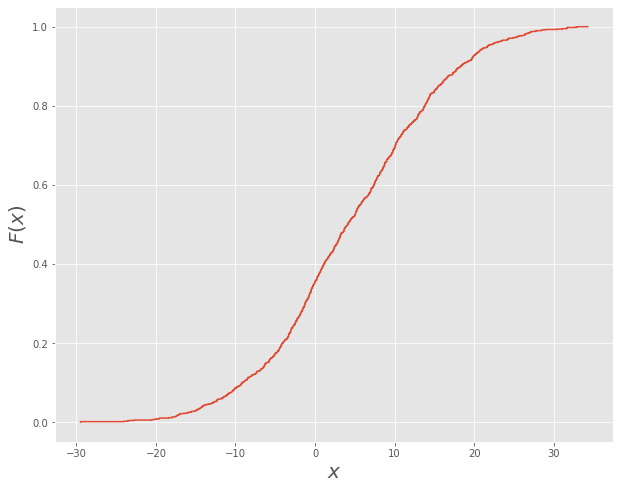

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample)   # строим эмпирическую функцию по выборке

plt.figure(figsize=(10,8))
plt.step(ecdf.x, ecdf.y)
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

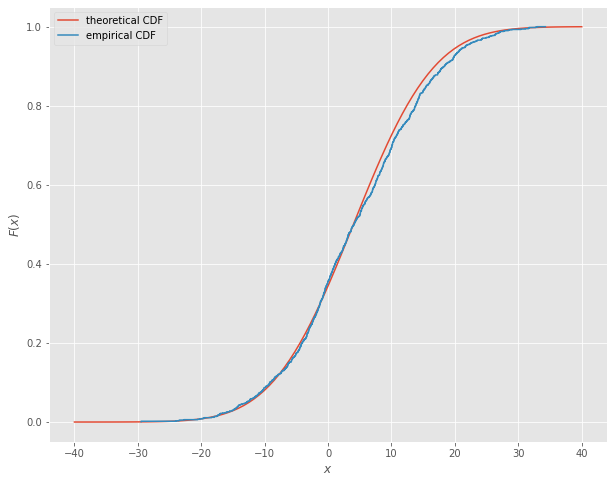

In [15]:
x = np.linspace(-40, 40, 100)

# теоретическа cdf 
cdf = norm_rv.cdf(x)

plt.figure(figsize=(10,8))
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

## Упражнение 2 

Пусть количество писем со спамом, которое пришло к нам на почту, имеет распределение Пуассона. Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем?

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

mu = 3
poisson = sts.poisson(mu)
p = 1-poisson.cdf(5)

# your code here
print(p)

0.08391794203130343


Сгенерируем выборку распределения Пуассона и посмотрим на частотную гистаграмму

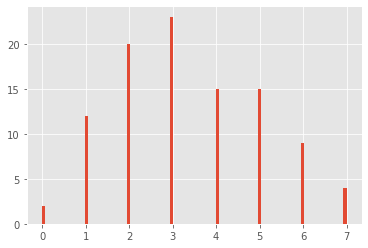

In [17]:
sample_pois = poisson.rvs(100)
plt.hist(sample_pois , bins=100);

Постороим по эмперическую функцию распредления по выборке

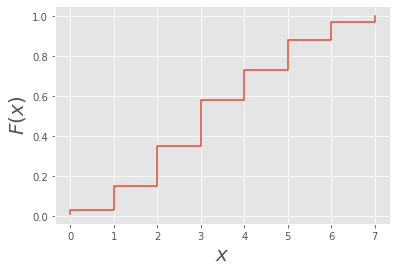

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_p = ECDF(sample_pois)   # строим эмпирическую функцию по выборке

plt.step(ecdf_p.x, ecdf_p.y)
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

Построим также теоретическую функцию распределения

Text(0.5, 0, '$x$')

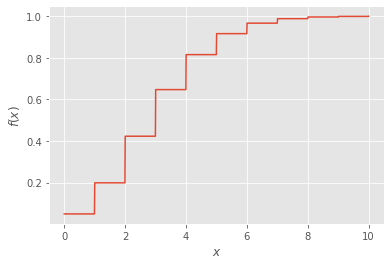

In [19]:
x = np.linspace(0, 10, 1000)
pmf = poisson.cdf(x)
plt.plot(x, pmf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Отметим, что вероятность (в данном случае доля дней), что мы получаем 5 или меньше писем относится значению функции распределения в точке 4.  
Следовательно вероятность, что мы получаем 5 и более писем будет:

In [21]:
p = 1-poisson.cdf(4)
print(p)

0.1847367554762278


In [22]:
assert np.abs(p - 0.1847367) < 1e-5